In [210]:
%load_ext autoreload
%autoreload 2

import set_embedding
import torch
import random
import json
from pprint import pprint as pp
from matplotlib import pyplot as plt
from slack import *

device = torch.device(7)
print(torch.__version__, device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.4.0 cuda:7


In [211]:
with open('contextualized-lines.json') as f:
    contextual_dataset = json.load(f) 

In [205]:
pp(random.sample(contextual_dataset['train'], 10))

[{'c': ['def',
        'render',
        'self',
        'name',
        'value',
        'attrs',
        'None',
        'value',
        'value',
        'or'],
  'i': ['ajax_select', 'django'],
  'l': 'final_attrs = self.build_attrs(attrs)'},
 {'c': ['range', 'N', 'p2', 'append', 'p', 'i', 'move', 'p', 'p2', 'w'],
  'i': ['math', 'random'],
  'l': 'for i in range(N):'},
 {'c': ['for',
        'this',
        'thread',
        'Thread',
        'local',
        'configuration',
        'always',
        'overrides',
        'process',
        'wide'],
  'i': ['paste', 'have'],
  'l': 'configuration.'},
 {'c': ['from',
        'reaper_python',
        'import',
        'from',
        'random',
        'import',
        'randint',
        'ourProject'],
  'i': ['random', 'reaper_python'],
  'l': 'for track in range(RPR_CountTracks(ourProject)-1, -1, -1):'},
 {'c': ['os',
        'path',
        'dirname',
        'os',
        'path',
        'realpath',
        '__file__',
        '

In [195]:
s_emb = set_embedding.SetEmbedding(device, hidden_size=256)

In [181]:
def random_string():
    return ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=random.randint(1, 2)))

def generate_toy_dataset(n=10000, k=5):
    ds = []
    for i in range(n):
        ds.append([random_string() for _ in range(k)])
    return ds

def filter_contexts(l, max_len=20):
    ans = []
    for c in l:
        try:
            for s in c:
                if len(s) > max_len:
                    raise ValueError("Too long")
                s.encode('ascii')
            ans.append(c)
        except:
            pass
    print('{}/{} could be encoded in ascii.'.format(len(ans), len(l)))
    return ans

toy_dataset = generate_toy_dataset()

In [196]:
contexts_dataset = filter_contexts([row['c'] for row in contextual_dataset['train']])
imports_dataset = filter_contexts([row['i'] for row in contextual_dataset['train']])
print(len(contexts_dataset), 'examples of contexts.')
print(len(imports_dataset), 'examples of imports.')

1221331/1331721 could be encoded in ascii.
1317256/1331721 could be encoded in ascii.
1221331 examples of contexts.
1317256 examples of imports.


In [204]:
# ds = generate_toy_dataset(50)
loss_history_ids, train_accuracy_ids = s_emb.train(contexts_dataset, {'epochs': 1, 'lr': 1e-3})
b

0.26% done, 01h59m01s left, 5.3 it/s loss = 0.671, train_acc = 0.697
0.52% done, 01h58m15s left, 5.4 it/s loss = 0.637, train_acc = 0.628
0.79% done, 01h58m44s left, 5.3 it/s loss = 0.643, train_acc = 0.596
1.05% done, 01h57m56s left, 5.3 it/s loss = 0.684, train_acc = 0.539
1.31% done, 01h57m08s left, 5.4 it/s loss = 0.688, train_acc = 0.550
1.57% done, 01h56m35s left, 5.4 it/s loss = 0.676, train_acc = 0.579
1.83% done, 01h55m28s left, 5.4 it/s loss = 0.586, train_acc = 0.683
2.10% done, 01h54m33s left, 5.4 it/s loss = 0.622, train_acc = 0.673
2.36% done, 01h54m50s left, 5.4 it/s loss = 0.604, train_acc = 0.650
2.62% done, 01h54m45s left, 5.4 it/s loss = 0.604, train_acc = 0.652
2.88% done, 01h54m44s left, 5.4 it/s loss = 0.592, train_acc = 0.684
3.14% done, 01h54m46s left, 5.4 it/s loss = 0.592, train_acc = 0.670
3.41% done, 01h54m22s left, 5.4 it/s loss = 0.630, train_acc = 0.627
3.67% done, 01h54m00s left, 5.4 it/s loss = 0.661, train_acc = 0.614
3.93% done, 01h53m28s left, 5.4 it

31.18% done, 01h16m57s left, 5.7 it/s loss = 0.272, train_acc = 0.880
31.44% done, 01h16m37s left, 5.7 it/s loss = 0.313, train_acc = 0.883
31.70% done, 01h16m17s left, 5.7 it/s loss = 0.327, train_acc = 0.861
31.96% done, 01h15m58s left, 5.7 it/s loss = 0.296, train_acc = 0.872
32.23% done, 01h15m38s left, 5.7 it/s loss = 0.312, train_acc = 0.856
32.49% done, 01h15m19s left, 5.7 it/s loss = 0.231, train_acc = 0.911
32.75% done, 01h14m59s left, 5.7 it/s loss = 0.243, train_acc = 0.903
33.01% done, 01h14m40s left, 5.7 it/s loss = 0.250, train_acc = 0.888
33.27% done, 01h14m21s left, 5.7 it/s loss = 0.230, train_acc = 0.904
33.54% done, 01h14m02s left, 5.7 it/s loss = 0.259, train_acc = 0.882
33.80% done, 01h13m42s left, 5.7 it/s loss = 0.256, train_acc = 0.901
34.06% done, 01h13m22s left, 5.7 it/s loss = 0.314, train_acc = 0.875
34.32% done, 01h13m02s left, 5.7 it/s loss = 0.282, train_acc = 0.870
34.58% done, 01h12m44s left, 5.7 it/s loss = 0.215, train_acc = 0.911
34.85% done, 01h12m2

62.62% done, 40m35s left, 5.9 it/s loss = 0.204, train_acc = 0.906
62.88% done, 40m18s left, 5.9 it/s loss = 0.268, train_acc = 0.878
63.14% done, 40m01s left, 5.9 it/s loss = 0.214, train_acc = 0.922
63.41% done, 39m44s left, 5.9 it/s loss = 0.147, train_acc = 0.943
63.67% done, 39m27s left, 5.9 it/s loss = 0.173, train_acc = 0.930
63.93% done, 39m10s left, 5.9 it/s loss = 0.213, train_acc = 0.917
64.19% done, 38m52s left, 5.9 it/s loss = 0.196, train_acc = 0.918
64.45% done, 38m35s left, 5.9 it/s loss = 0.166, train_acc = 0.937
64.72% done, 38m18s left, 5.9 it/s loss = 0.197, train_acc = 0.930
64.98% done, 38m00s left, 5.9 it/s loss = 0.170, train_acc = 0.926
65.24% done, 37m43s left, 5.9 it/s loss = 0.125, train_acc = 0.962
65.50% done, 37m26s left, 5.9 it/s loss = 0.116, train_acc = 0.958
65.76% done, 37m09s left, 5.9 it/s loss = 0.152, train_acc = 0.937
66.03% done, 36m52s left, 5.9 it/s loss = 0.216, train_acc = 0.908
66.29% done, 36m34s left, 5.9 it/s loss = 0.247, train_acc = 0

94.85% done, 05m35s left, 5.9 it/s loss = 0.104, train_acc = 0.965
95.11% done, 05m18s left, 5.9 it/s loss = 0.125, train_acc = 0.956
95.37% done, 05m01s left, 5.9 it/s loss = 0.076, train_acc = 0.981
95.63% done, 04m44s left, 5.9 it/s loss = 0.094, train_acc = 0.974
95.89% done, 04m27s left, 5.9 it/s loss = 0.113, train_acc = 0.970
96.16% done, 04m10s left, 5.9 it/s loss = 0.167, train_acc = 0.937
96.42% done, 03m53s left, 5.9 it/s loss = 0.136, train_acc = 0.942
96.68% done, 03m36s left, 5.9 it/s loss = 0.131, train_acc = 0.951
96.94% done, 03m19s left, 5.9 it/s loss = 0.152, train_acc = 0.942
97.20% done, 03m01s left, 5.9 it/s loss = 0.077, train_acc = 0.978
97.47% done, 02m44s left, 5.9 it/s loss = 0.162, train_acc = 0.943
97.73% done, 02m27s left, 5.9 it/s loss = 0.138, train_acc = 0.963
97.99% done, 02m10s left, 5.9 it/s loss = 0.151, train_acc = 0.944
98.25% done, 01m53s left, 5.9 it/s loss = 0.086, train_acc = 0.972
98.51% done, 01m36s left, 5.9 it/s loss = 0.158, train_acc = 0

NameError: name 'train_accuracy' is not defined

In [ ]:
loss_history_imps, train_accuracy_imps = s_emb.train(imports_dataset, {'epochs': 1, 'lr': 1e-3})
send_message('Imports embedding with contrast sets experiment finished. Last accuracies: {}'.format(train_accuracy[-10:]))

Slack message: Context embedding experiment finished. Last losses: [0.014059717766940594, 0.017997566610574722, 0.014961681328713894, 0.04524751752614975, 0.006547451019287109, 0.005744104739278555, 0.036416105926036835, 0.01962323859333992, 0.03929419815540314, 0.043753646314144135] (status: 200)


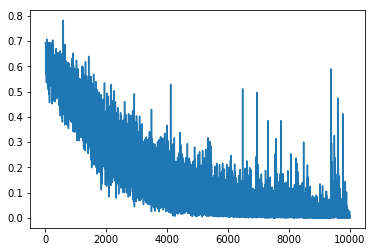

In [128]:
plt.plot(loss_history)

In [194]:
sa, sb = random.choices(contexts_dataset, k=2)

embs = s_emb.embed([sa, sb])

print('A:', sa)
print('B:', sb)

print(s_emb.query(embs[0], sa).cpu().tolist())
print(s_emb.query(embs[0], sb).round().cpu().tolist())

print(s_emb.query(embs[1], sa).cpu().tolist())
print(s_emb.query(embs[1], sb).round().cpu().tolist())

A: ['if', 'id', 'is', 'None', 'project', 'None', 'error', 'Invalid', 'URL', 'else']
B: ['itemsize', 'channel1', 'width1', 'tesseract', 'SetCvImage', 'iplimage', 'api', 'text', 'api', 'GetUTF8Text']
[0.999993085861206, 0.9999868869781494, 0.9998781681060791, 0.999984622001648, 0.9783746600151062, 0.999984622001648, 0.9993973970413208, 0.9997410178184509, 0.9993201494216919, 0.9999406337738037]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
[0.9999258518218994, 0.9988717436790466, 0.9996156692504883, 0.9959056377410889, 0.9774314761161804, 0.9959056377410889, 0.961309552192688, 0.01786724664270878, 0.9066974520683289, 0.998838484287262]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [220]:
s_emb.embed([[], []])

tensor([[ 9.7722e-01,  3.6479e-01, -2.7155e-01,  2.8638e+00, -5.0256e+00,
          9.4598e+00,  3.6689e+00, -4.8707e-01, -9.8424e-01,  2.4321e-01,
          4.8586e-01, -2.5178e+00,  8.5461e+00,  7.7621e+00,  1.3212e+00,
          1.8350e+00, -4.6153e+00,  1.9278e+00,  2.3864e+00,  1.8577e-02,
         -2.6172e-01, -2.3205e+00, -2.6670e+00,  1.2094e+00,  3.2383e+00,
          4.1187e+00,  8.7791e-01, -1.9699e+00,  9.6274e-01,  5.8488e+00,
          1.5854e+00, -2.6735e-01, -8.6700e+00, -1.8713e+01, -1.2898e+01,
         -3.2434e+00, -2.0057e+00,  2.3295e+00, -6.3131e+00, -1.9880e+00,
         -2.7159e+00,  7.0772e+00,  1.1146e+00,  1.6893e+00, -9.8526e-01,
         -3.2706e+00, -5.2080e+00,  3.9967e-02,  5.8948e+00, -2.1028e+00,
         -2.2373e-01, -9.6601e-01, -3.3851e+00,  1.4145e+00,  2.3639e+00,
         -1.2074e+00, -1.8400e+00, -3.0631e-01,  2.1498e+00, -3.0025e+00,
         -5.6302e+00, -3.1193e-01, -5.9504e+00,  2.5157e+00, -1.5886e+00,
         -1.7076e+00, -4.5228e-01, -3.